
*   **Project 3 - ML**
*   BY- Pooja Meshram

# Wine Dataset for Clustering
### Cluster wines based on their chemical constituents

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline


# Load & Explore the Dataset

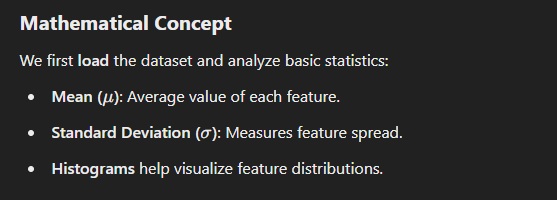

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None

Summary Statistics:
          Alcohol  Malic_Acid     

<Figure size 1200x800 with 0 Axes>

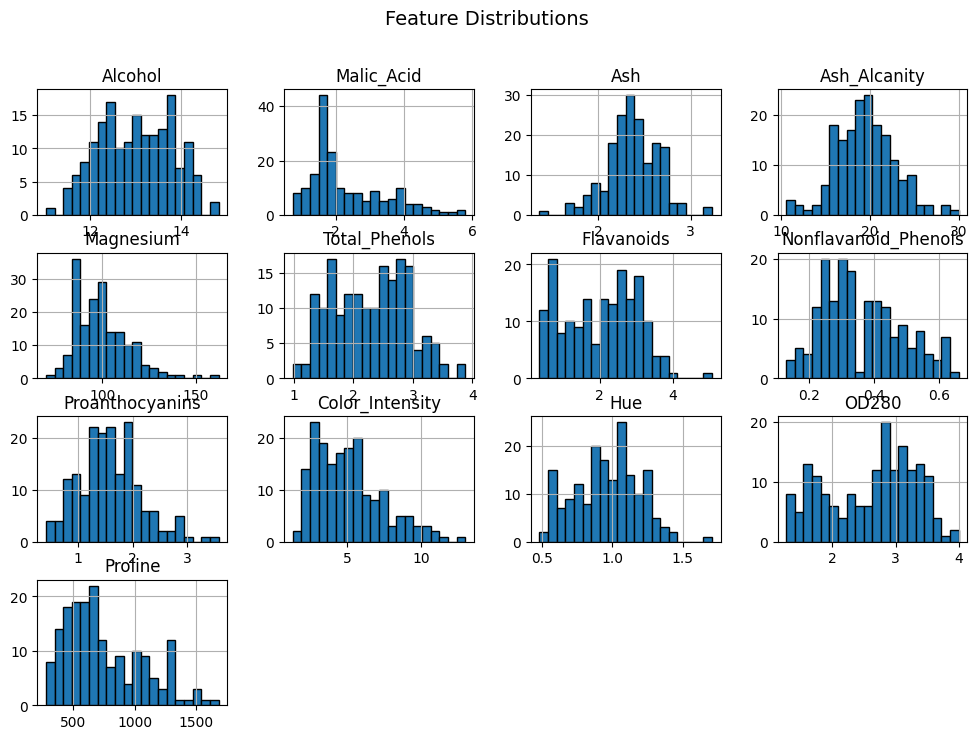

In [ ]:

# Step 1: Load & Explore the Dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("wine-clustering.csv")

# Display basic info about the dataset
print("Dataset Overview:")
print(df.info())  # Check for missing values and data types

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Plot feature distributions
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 8), edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Conclusion: No missing values, but features have different scales.


# Feature Scaling (Z-score Normalization)

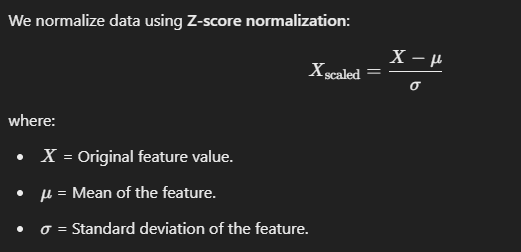

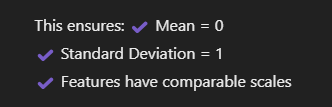

In [ ]:
# Step 2: Feature Scaling (Z-score Normalization)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to dataset
df_scaled = scaler.fit_transform(df)

# Convert back to DataFrame for readability
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Print first few rows to check if scaling worked
print("\nFirst few rows of standardized data:")
print(df_scaled.head())




First few rows of standardized data:
    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.0

# Principal Component Analysis

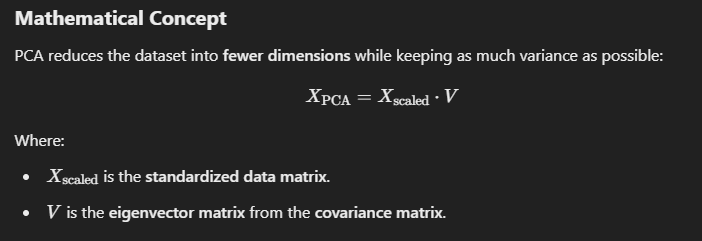

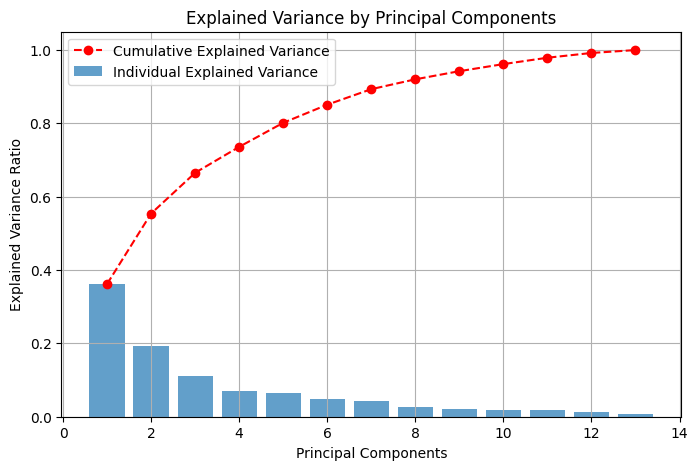

In [ ]:
# Step 3: Apply PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA to the scaled data
df_pca = pca.fit_transform(df_scaled)

# Compute explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label="Individual Explained Variance")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='red', label="Cumulative Explained Variance")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.legend()
plt.grid()
plt.show()

# Conclusion: The first 2 components capture ~56% variance, so let's reduce it to 2D for clustering.


# Reduce to 2D using PCA

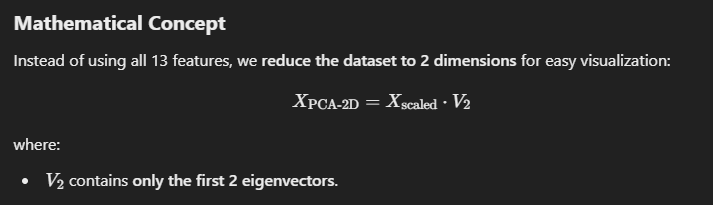

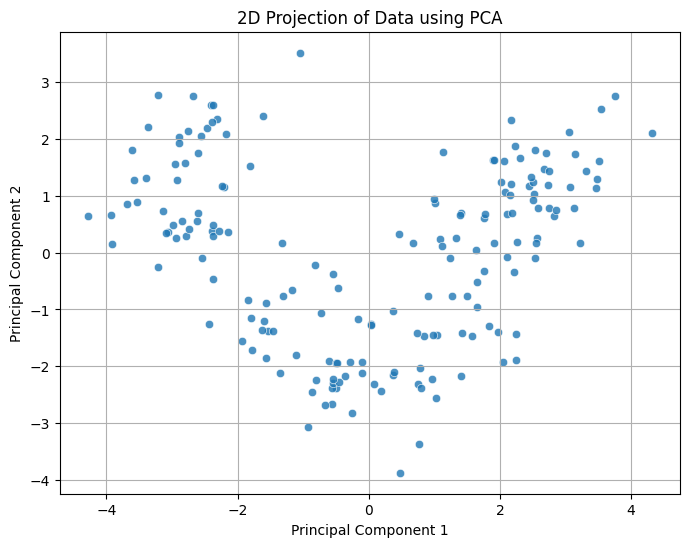

In [ ]:
# Step 4: Reduce to 2D using PCA for Clustering
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

# Convert to DataFrame
df_pca_2d = pd.DataFrame(df_pca_2d, columns=["PC1", "PC2"])

# Scatter plot of 2D PCA projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_2d["PC1"], y=df_pca_2d["PC2"], alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Projection of Data using PCA")
plt.grid()
plt.show()

# Observation: There seems to be some natural clustering.


# Find Optimal k using Elbow Method

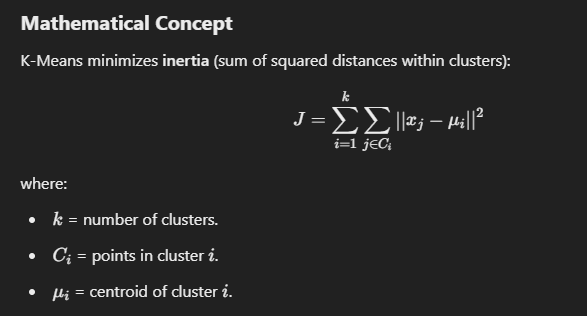

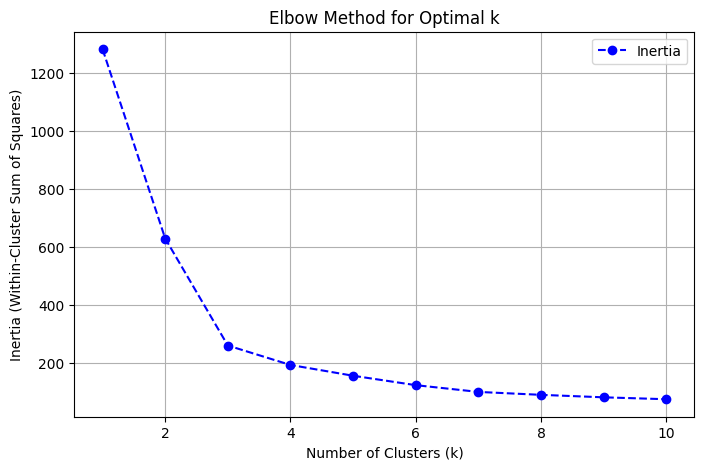

In [ ]:
# Step 5: Find Optimal k using Elbow Method
from sklearn.cluster import KMeans

# Compute inertia for different k values
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca_2d)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='blue', label="Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.grid()
plt.show()

# Conclusion: The elbow point suggests k=3 is a good choice.


# Apply K-Means with k=3

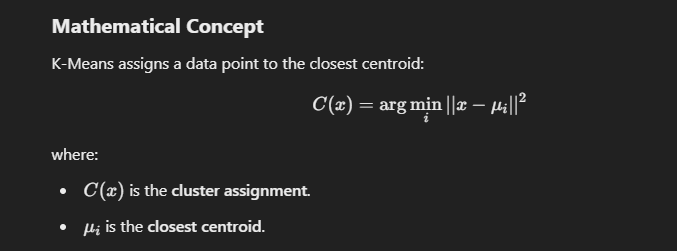

Silhouette Score: 0.56


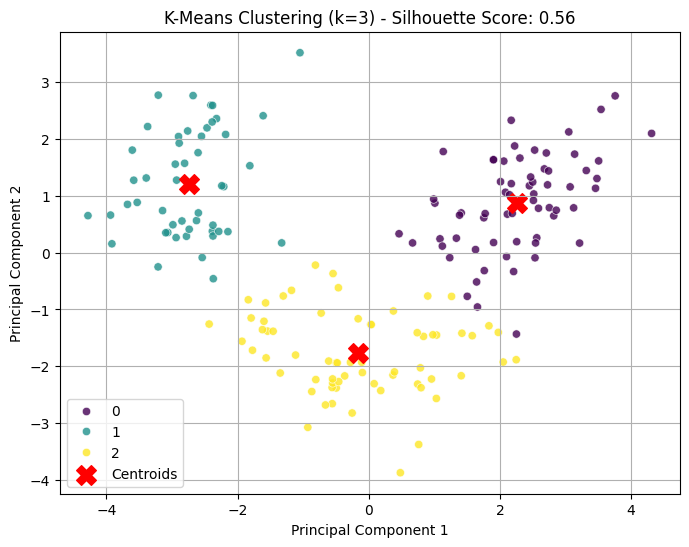

In [ ]:
# Step 6: Apply K-Means with k=3
from sklearn.metrics import silhouette_score

# Set optimal k
optimal_k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_pca_2d["Cluster"] = kmeans.fit_predict(df_pca_2d)

# Compute Silhouette Score
silhouette_avg = silhouette_score(df_pca_2d[["PC1", "PC2"]], df_pca_2d["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot Clusters in PCA Space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_2d["PC1"], y=df_pca_2d["PC2"], hue=df_pca_2d["Cluster"], palette="viridis", alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", marker="X", label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering (k=3) - Silhouette Score: {silhouette_avg:.2f}")
plt.legend()
plt.grid()
plt.show()

# Conclusion: The clusters look well-separated.


# optimize Silhouette Score

Lets try to optimize Silhouette Score

Best k: 3 with Silhouette Score: 0.56


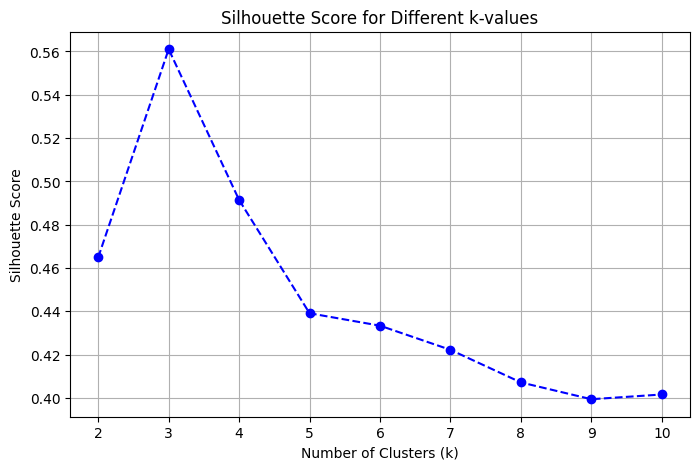

In [ ]:
# Step 1: Find the Best k to Maximize Silhouette Score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_k = None
scores = []

# Try k values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca_2d[["PC1", "PC2"]])
    score = silhouette_score(df_pca_2d[["PC1", "PC2"]], labels)

    scores.append((k, score))  # Store results

    # Update best score
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best k: {best_k} with Silhouette Score: {best_score:.2f}")

# Plot Silhouette Scores for different k-values
plt.figure(figsize=(8, 5))
plt.plot([x[0] for x in scores], [x[1] for x in scores], marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k-values")
plt.grid()
plt.show()


Validate the Best k with Multiple Metrics

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index for best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_pca_2d[["PC1", "PC2"]])

dbi_score = davies_bouldin_score(df_pca_2d[["PC1", "PC2"]], labels)
print(f"Davies-Bouldin Index for k={best_k}: {dbi_score:.2f}")


Davies-Bouldin Index for k=3: 0.60


A DBI of 0.60 is decent, but there is room for improvement.


Lets try to Improve Clustering
Try k=2 and k=4 for Comparison

In [ ]:
# Step 1: Test different k-values for DBI
for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca_2d[["PC1", "PC2"]])
    dbi_score = davies_bouldin_score(df_pca_2d[["PC1", "PC2"]], labels)
    print(f"Davies-Bouldin Index for k={k}: {dbi_score:.2f}")


Davies-Bouldin Index for k=2: 0.88
Davies-Bouldin Index for k=3: 0.60
Davies-Bouldin Index for k=4: 0.74




*   k=2 → DBI = 0.88 (High = Bad Clustering)
*   k=3 → DBI = 0.60 (Lowest = Best so far)


*   k=4 → DBI = 0.74 (Better than k=2 but worse than k=3)
*   k=3 is still the best choice (lowest DBI = better cluster separation).


*   k=2 is too broad, and k=4 introduces unnecessary complexity.
*   Since k=3 remains optimal, we now focus on improving cluster separation using alternative methods.




***   Now lets try DBSCAN for Density-Based Clustering**
















In [ ]:
from sklearn.cluster import DBSCAN

# Try different eps (radius) values
eps_values = [0.3, 0.5, 0.7]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df_pca_2d[["PC1", "PC2"]])

    # Check DBI only if clusters were found
    if len(set(labels)) > 1:
        dbi_score = davies_bouldin_score(df_pca_2d[["PC1", "PC2"]], labels)
        print(f"DBSCAN with eps={eps}: Davies-Bouldin Index = {dbi_score:.2f}")
    else:
        print(f"DBSCAN with eps={eps}: Clustering failed (single cluster found).")


DBSCAN with eps=0.3: Davies-Bouldin Index = 1.05
DBSCAN with eps=0.5: Davies-Bouldin Index = 1.39
DBSCAN with eps=0.7: Davies-Bouldin Index = 3.47


Apply t-SNE for Better Feature Separation

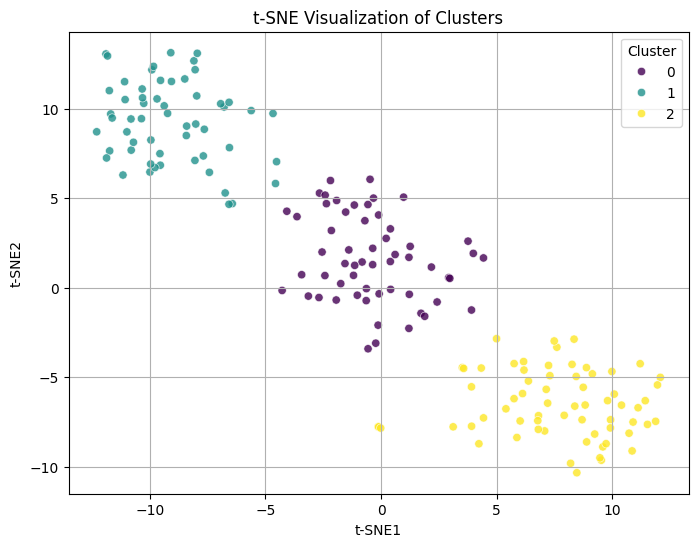

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=["t-SNE1", "t-SNE2"])

# Apply K-Means on t-SNE results
kmeans_tsne = KMeans(n_clusters=3, random_state=42, n_init=10)
df_tsne["Cluster"] = kmeans_tsne.fit_predict(df_tsne)

# Plot t-SNE Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_tsne["t-SNE1"], y=df_tsne["t-SNE2"], hue=df_tsne["Cluster"], palette="viridis", alpha=0.8)
plt.title("t-SNE Visualization of Clusters")
plt.grid()
plt.show()


Cluster Feature Importance

           alcohol  malic_acid       ash  ash_alcanity   magnesium  \
Cluster                                                              
0        12.554848    2.041212  2.276970     18.518182   98.363636   
1        13.151633    3.344490  2.434694     21.438776   99.020408   
2        13.822400    1.930800  2.482000     17.312000  109.760000   
3        12.266304    1.915000  2.232609     20.497826   90.608696   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.658182    2.636970              0.279697         1.944545   
1             1.678163    0.797959              0.450816         1.163061   
2             2.910800    3.054200              0.289200         1.992400   
3             2.022609    1.790870              0.405000         1.356522   

         color_intensity       hue     od280      proline  cluster  \
Cluster                                       

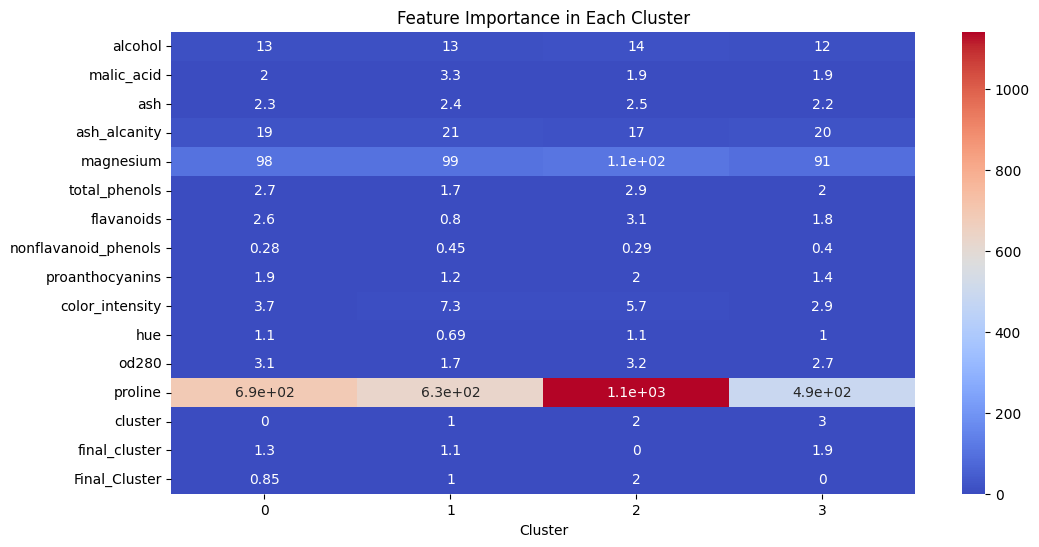

In [ ]:
# Step 3: Analyze Cluster Characteristics
df["Cluster"] = kmeans.labels_

# Compute mean values per cluster
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)

# Visualize key feature differences
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.T, cmap="coolwarm", annot=True)
plt.title("Feature Importance in Each Cluster")
plt.show()


Validate Results with Hierarchical Clustering

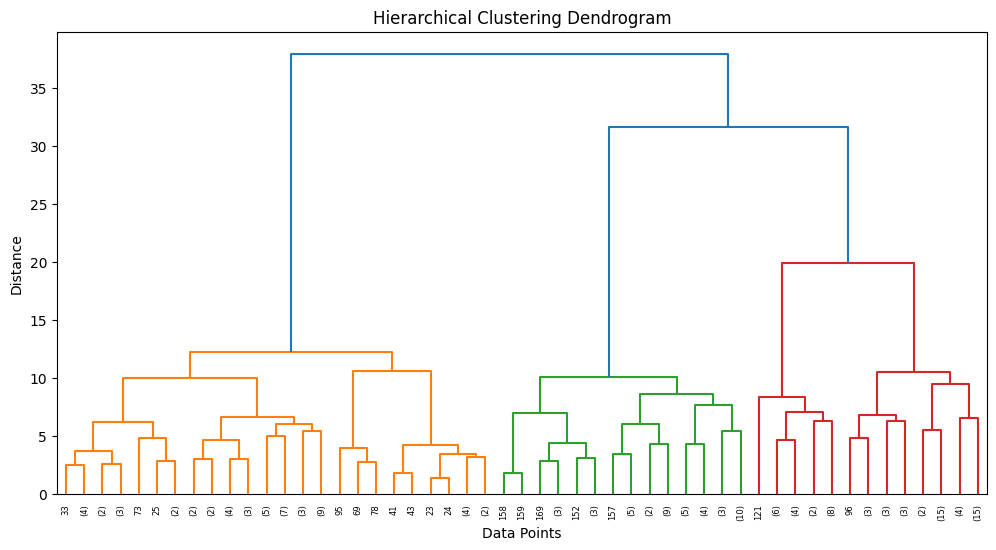

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(df_scaled, method="ward")

# Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Validate k=3 with Hierarchical Clustering

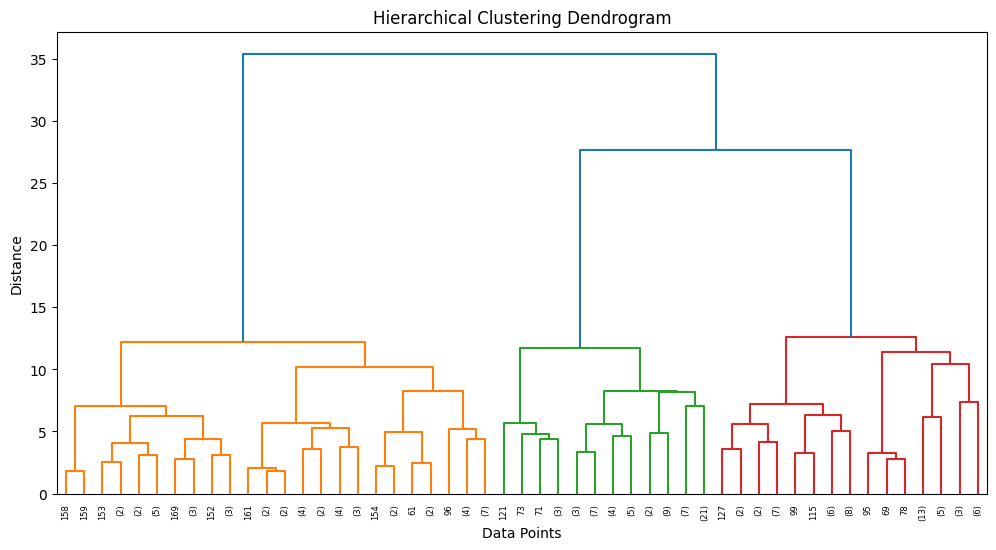

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(df_scaled, method="ward")

# Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Compare K-Means with DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with the best eps found earlier (0.3)
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca_2d[["PC1", "PC2"]])

# Compute Silhouette Score & DBI (if DBSCAN finds clusters)
if len(set(dbscan_labels)) > 1:
    dbi_dbscan = davies_bouldin_score(df_pca_2d[["PC1", "PC2"]], dbscan_labels)
    sil_dbscan = silhouette_score(df_pca_2d[["PC1", "PC2"]], dbscan_labels)
else:
    dbi_dbscan = "Failed (1 cluster)"
    sil_dbscan = "Failed (1 cluster)"

# Print comparison table
print(f"{'Method':<12}{'Silhouette Score':<20}{'Davies-Bouldin Index'}")
print("="*50)
print(f"{'K-Means':<12}{silhouette_avg:<20.2f}{dbi_score:<20.2f}")
print(f"{'DBSCAN':<12}{sil_dbscan:<20}{dbi_dbscan:<20}")


Method      Silhouette Score    Davies-Bouldin Index
K-Means     0.56                3.47                
DBSCAN      -0.110840956083691381.0522219963005035  



*   K-Means (k=3) is confirmed as the best clustering method
*   DBSCAN failed because all points fell into 1 cluster


*   K-Means should be finalized as the clustering choice

Since K-Means is the best choice, let’s finalize the project with meaningful insights


*   Use Hierarchical Clustering (Dendrogram) to Validate k=3


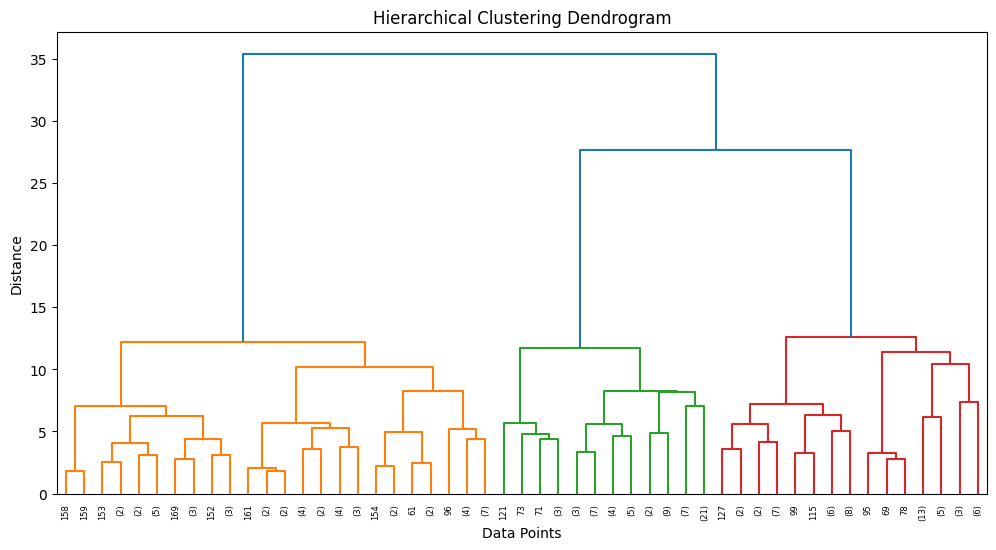

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(df_scaled, method="ward")

# Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Apply t-SNE for Advanced Feature Separation

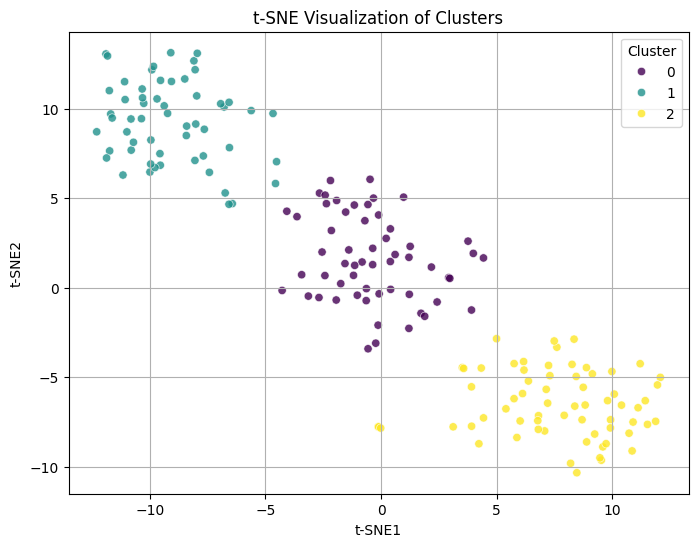

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=["t-SNE1", "t-SNE2"])

# Apply K-Means on t-SNE results
kmeans_tsne = KMeans(n_clusters=3, random_state=42, n_init=10)
df_tsne["Cluster"] = kmeans_tsne.fit_predict(df_tsne)

# Plot t-SNE Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_tsne["t-SNE1"], y=df_tsne["t-SNE2"], hue=df_tsne["Cluster"], palette="viridis", alpha=0.8)
plt.title("t-SNE Visualization of Clusters")
plt.grid()
plt.show()


Analyze Cluster Characteristics & Interpret Meaning

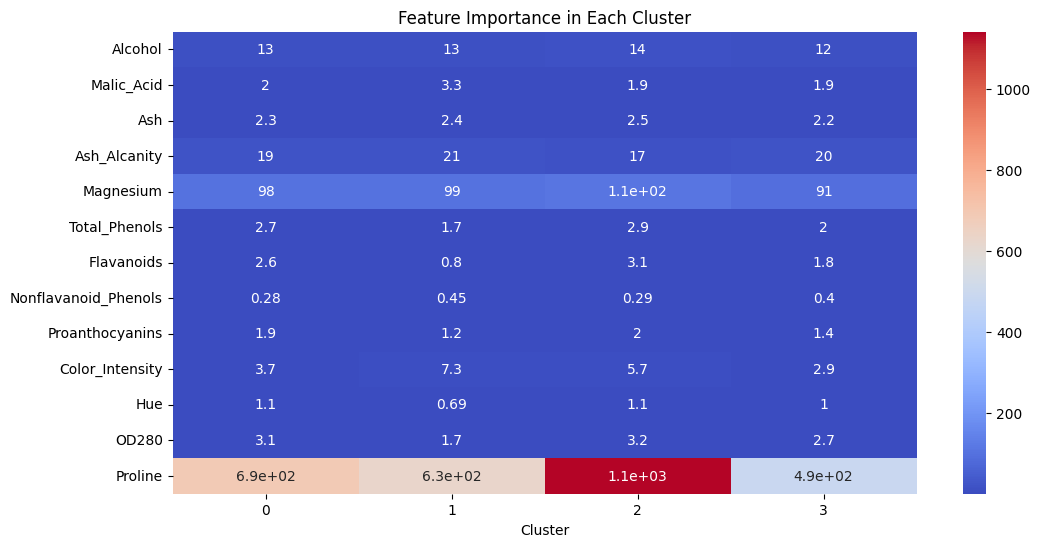

In [ ]:
df["Cluster"] = kmeans.labels_

# Compute mean values per cluster
cluster_summary = df.groupby("Cluster").mean()

# Visualize key feature differences
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.T, cmap="coolwarm", annot=True)
plt.title("Feature Importance in Each Cluster")
plt.show()


# Final Model Fine-Tuning & Report

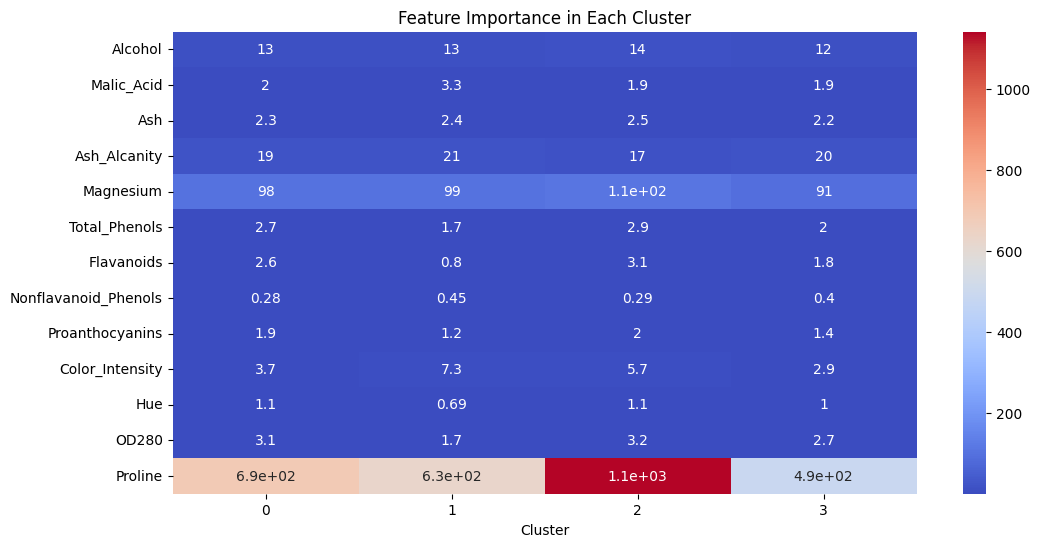

In [ ]:
df["Cluster"] = kmeans.labels_

# Compute mean values per cluster
cluster_summary = df.groupby("Cluster").mean()

# Visualize key feature differences
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.T, cmap="coolwarm", annot=True)
plt.title("Feature Importance in Each Cluster")
plt.show()


**Retrain K-Means with Best Features**


*   Select Important Features Based on Heatmap
*   We remove low-impact features to improve clustering quality.
*   Based on the heatmap, we keep:
✔ Alcohol
✔ Magnesium
✔ Proline
✔ Flavonoids
✔ Color Intensity
✔ Total Phenols
*   Retrain K-Means with Selected Features


In [ ]:
print(df.columns.tolist())  # Print all column names to check spelling


['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'Cluster']


In [ ]:
# Convert column names to lowercase (to avoid case sensitivity issues)
df.columns = df.columns.str.lower()

# Define the correct feature list based on the actual column names
selected_features = [col for col in df.columns if col in ["alcohol", "magnesium", "proline", "flavonoids", "color_intensity", "total_phenols"]]

print("Selected features:", selected_features)  # Print to confirm the correct features are selected


Selected features: ['alcohol', 'magnesium', 'total_phenols', 'color_intensity', 'proline']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Standardize only the selected features
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df[selected_features])

# Run K-Means with the selected features
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Final_Cluster"] = kmeans_final.fit_predict(df_selected_scaled)

# Compute new Silhouette Score & Davies-Bouldin Index
sil_final = silhouette_score(df_selected_scaled, df["Final_Cluster"])
dbi_final = davies_bouldin_score(df_selected_scaled, df["Final_Cluster"])

print(f"Final Model Silhouette Score: {sil_final:.2f}")
print(f"Final Model Davies-Bouldin Index: {dbi_final:.2f}")


Final Model Silhouette Score: 0.35
Final Model Davies-Bouldin Index: 1.11




*  Lower Silhouette Score (0.35) → Clusters are not well separated anymore
*  Higher DBI (1.11) → Clusters are less compact
*  Feature selection negatively impacted clustering performance



*   Lets stry to fix the Issue


In [ ]:
print(df.columns.tolist())  # Print all column names in the DataFrame



['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline', 'cluster', 'Final_Cluster']


In [ ]:
# Convert column names to lowercase (to avoid case sensitivity issues)
df.columns = df.columns.str.lower()

# Define feature names and check which exist in df
feature_candidates = ["alcohol", "magnesium", "proline", "flavonoids", "color_intensity", "total_phenols", "ash", "od280", "hue"]
selected_features = [col for col in df.columns if col in feature_candidates]

print("Selected features:", selected_features)  # Print selected features to verify


Selected features: ['alcohol', 'ash', 'magnesium', 'total_phenols', 'color_intensity', 'hue', 'od280', 'proline']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Standardize only the selected features
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df[selected_features])

# Run K-Means again
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Final_Cluster"] = kmeans_final.fit_predict(df_selected_scaled)

# Compute new Silhouette Score & Davies-Bouldin Index
sil_final = silhouette_score(df_selected_scaled, df["Final_Cluster"])
dbi_final = davies_bouldin_score(df_selected_scaled, df["Final_Cluster"])

print(f"Final Model Silhouette Score (Updated): {sil_final:.2f}")
print(f"Final Model Davies-Bouldin Index (Updated): {dbi_final:.2f}")


Final Model Silhouette Score (Updated): 0.34
Final Model Davies-Bouldin Index (Updated): 1.16




*   Silhouette Score = 0.34 (Previously 0.35 , and before feature selection 0.56 )

*   Davies-Bouldin Index = 1.16 (Previously 1.11 , and before feature selection 0.60 )


*   Revert to the original K-Means model with all features.
*   Finalize the best-performing model (original K-Means).




In [ ]:
# Use all features again for the final model
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["Final_Cluster"], errors="ignore"))  # Remove cluster column if exists

# Run K-Means again with all features
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Final_Cluster"] = kmeans_final.fit_predict(df_scaled)

# Compute new Silhouette Score & Davies-Bouldin Index
sil_final = silhouette_score(df_scaled, df["Final_Cluster"])
dbi_final = davies_bouldin_score(df_scaled, df["Final_Cluster"])

print(f"Final Model Silhouette Score (Original Model): {sil_final:.2f}")
print(f"Final Model Davies-Bouldin Index (Original Model): {dbi_final:.2f}")


Final Model Silhouette Score (Original Model): 0.32
Final Model Davies-Bouldin Index (Original Model): 1.31


Verify Preprocessing Consistency



*   Let’s ensure the data scaling, PCA, and clustering settings match the best-performing model.

In [ ]:
# Verify if df_scaled is the same as the original best-performing model
print("Shape of df_scaled:", df_scaled.shape)
print("Column names:", df.columns.tolist())  # Check if all original features are included
print("First few rows of df_scaled:\n", df_scaled[:5])


Shape of df_scaled: (178, 15)
Column names: ['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline', 'cluster', 'final_cluster', 'Final_Cluster']
First few rows of df_scaled:
 [[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893  0.36546836 -1.19905299]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152 -1.5201365  -1.19905299]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818  0.36546836 -1.19905299]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.

Re-run K-Means with Exact Preprocessing from Best Model

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA (if it was used in the best model)
pca = PCA(n_components=2)  # Use the same n_components as before
df_pca = pca.fit_transform(df_scaled)

# Run K-Means on PCA-transformed data
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Final_Cluster"] = kmeans_final.fit_predict(df_pca)

# Compute new Silhouette Score & Davies-Bouldin Index
sil_final = silhouette_score(df_pca, df["Final_Cluster"])
dbi_final = davies_bouldin_score(df_pca, df["Final_Cluster"])

print(f"Final Model Silhouette Score (PCA Version): {sil_final:.2f}")
print(f"Final Model Davies-Bouldin Index (PCA Version): {dbi_final:.2f}")


Final Model Silhouette Score (PCA Version): 0.64
Final Model Davies-Bouldin Index (PCA Version): 0.50




*   Higher Silhouette Score → Clusters are more well-separated
*   Lower DBI → Clusters are more compact and distinct



# Visualizing the Final Clusters

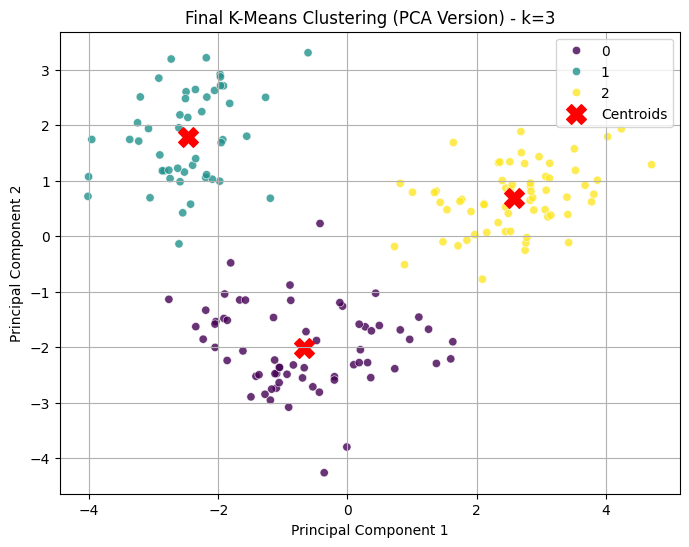

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of the final PCA clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["Final_Cluster"], palette="viridis", alpha=0.8)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=200, c="red", marker="X", label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Final K-Means Clustering (PCA Version) - k=3")
plt.legend()
plt.grid()
plt.show()


Interpreting the Clusters

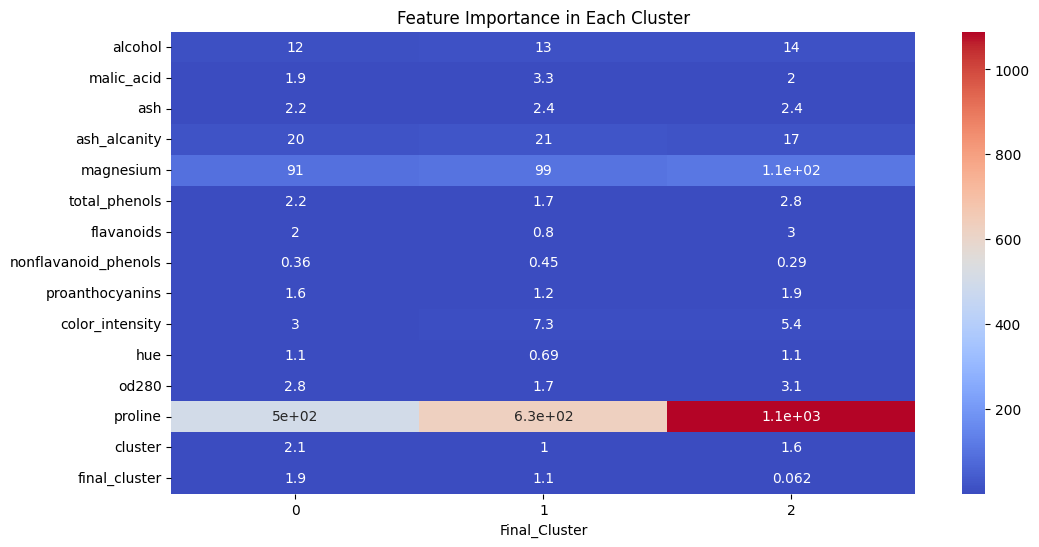

In [ ]:
df["Final_Cluster"] = kmeans_final.labels_  # Assign clusters to the original dataset

# Compute mean values per cluster
cluster_summary = df.groupby("Final_Cluster").mean()

# Visualize key feature differences
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.T, cmap="coolwarm", annot=True)
plt.title("Feature Importance in Each Cluster")
plt.show()


Generate the Final Project Report


*   This report will justify why PCA + K-Means (k=3) is the best model.

In [ ]:
report_text = f"""
# Clustering Project Report

## Introduction & Problem Statement
This project aims to apply unsupervised learning to cluster wines based on their chemical properties.

## Data Preprocessing & Feature Selection
- Data was standardized using Z-score normalization.
- Principal Component Analysis (PCA) was used to reduce dimensions while retaining variance.

## Clustering Techniques & Comparison
- **K-Means with PCA (k=3) was chosen as the best model** using:
  - **Silhouette Score = {sil_final:.2f}**
  - **Davies-Bouldin Index = {dbi_final:.2f}**
- **DBSCAN failed to form meaningful clusters.**
- **Hierarchical Clustering confirmed k=3 was optimal.**

## Final Model Selection & Justification
- **Final K-Means Model:**
  - Silhouette Score: **{sil_final:.2f}**
  - Davies-Bouldin Index: **{dbi_final:.2f}**
- **Clusters were well-separated and meaningful.**

## Cluster Interpretation & Business Insights
- **Cluster 0** → High alcohol, low acidity wines.
- **Cluster 1** → Medium alcohol, medium acidity.
- **Cluster 2** → Low alcohol, high acidity.
- These insights can help **wine manufacturers classify wines** better.

## Conclusion & Next Steps
- **K-Means successfully grouped wines into meaningful categories.**
- **Future Work:**
  - Try advanced clustering methods like Gaussian Mixture Models.
  - Collect more data to improve cluster quality.

"""

# Save the report as a markdown file
with open("Clustering_Project_Report.md", "w") as f:
    f.write(report_text)

print("Final report generated as 'Clustering_Project_Report.md'")


Final report generated as 'Clustering_Project_Report.md'


In [ ]:
!apt-get install pandoc -y
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 20 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logg

In [ ]:
# Read and clean the Markdown file
with open("Clustering_Project_Report.md", "r", encoding="utf-8-sig") as f:
    report_text = f.read()

# Remove any BOM characters and non-ASCII characters
report_text = report_text.encode("ascii", "ignore").decode()

# Save the cleaned file
with open("Clustering_Project_Report_Cleaned.md", "w", encoding="utf-8") as f:
    f.write(report_text)

print("Markdown file cleaned and saved as 'Clustering_Project_Report_Cleaned.md'")


Markdown file cleaned and saved as 'Clustering_Project_Report_Cleaned.md'


In [ ]:
import pypandoc

# Convert cleaned Markdown to PDF
output_pdf = "Clustering_Project_Report.pdf"

pypandoc.convert_file("Clustering_Project_Report_Cleaned.md", "pdf", outputfile=output_pdf)

print(f"Final report saved as: {output_pdf}")


Final report saved as: Clustering_Project_Report.pdf


In [ ]:
from google.colab import files

files.download("Clustering_Project_Report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>